In [1]:
import tensorflow as tf

# data 

In [2]:
data = tf.keras.utils.get_file('flower_photos',
                             'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                              untar=True
                            )

In [3]:
data

'C:\\Users\\drogpard\\.keras\\datasets\\flower_photos'

# path

In [4]:
import os

In [5]:
os.sep

'\\'

In [6]:
os.listdir(data)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [7]:
import pathlib

In [8]:
import glob

In [9]:
p = pathlib.Path(data)

In [10]:
p

WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos')

In [11]:
img = list(p.glob('*/*.jpg'))

In [12]:
img # classification 용으로는 direcotry별로 이미지 저장 - 관례상 (편의 기능 사용 가능)

[WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/drogpard/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath(

# pipeline (holdout)

In [13]:
# 1
training = tf.keras.preprocessing.image_dataset_from_directory(p, 
                                                               subset='training', 
                                                               batch_size=64,
                                                               validation_split=0.3, 
                                                               seed=41) # tf.data.Dataset
validation = tf.keras.preprocessing.image_dataset_from_directory(p, 
                                                                 subset='validation', 
                                                                 validation_split=0.3,
                                                                 seed=41) # tf.data.Dataset

Found 3670 files belonging to 5 classes.
Using 2569 files for training.
Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


# batch

In [14]:
training

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# preprocessing

In [15]:
training_ = training.map(lambda x,y : (x/255,y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ = validation.map(lambda x,y : (x/255,y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# model ( > Transfer learning)

In [16]:
input_ = tf.keras.Input((256,256,3))

In [17]:
x = tf.keras.layers.Conv2D(64, 3)(input_)
x = tf.keras.layers.BatchNormalization()(input_)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
x = tf.keras.layers.Conv2D(128,3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(256,3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
#x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.GlobalAvgPool2D()(x)
x = tf.keras.layers.Dense(5)(x)

In [18]:
model = tf.keras.Model(input_, x)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256, 256, 3)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 3)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     3584      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 128)    512   

In [20]:
import tensorflow_addons as tfa

In [21]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['acc'])

# train

In [22]:
# callbaack 

In [23]:
tf.keras.callbacks.EarlyStopping
tf.keras.callbacks.LearningRateScheduler
tf.keras.callbacks.ReduceLROnPlateau
tf.keras.callbacks.ModelCheckpoint

keras.callbacks.ModelCheckpoint

In [24]:
history = model.fit(training_, epochs=3, validation_data=validation_)

Epoch 1/3
41/41 [==============================] - 692s 17s/step - loss: 1.2940 - acc: 0.4644 - val_loss: 1.6341 - val_acc: 0.2352
Epoch 2/3
41/41 [==============================] - 720s 18s/step - loss: 1.1630 - acc: 0.5325 - val_loss: 1.7552 - val_acc: 0.2343
Epoch 3/3
41/41 [==============================] - 724s 18s/step - loss: 1.1033 - acc: 0.5613 - val_loss: 1.7961 - val_acc: 0.2343


In [25]:
import pandas as pd

<AxesSubplot:>

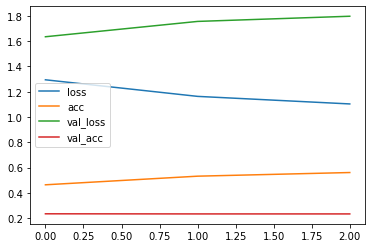

In [26]:
pd.DataFrame(history.history).plot.line()